In [1]:
%pylab inline
import biff
from pygadgetreader import readsnap

Populating the interactive namespace from numpy and matplotlib


In [2]:
def re_center_halo(pos, r_cm):
    """
    Re-center a halo positions or velocities.
    """

    print('COM coordinates', r_cm)
    pos_cm = np.copy(pos)
    for i in range(3):
        pos_cm[:,i] = pos[:,i] - r_cm[i]
    return pos_cm

def truncate(pos, mass, rcut):
    r = (pos[:,0]**2 + pos[:,1]**2 + pos[:,2]**2)**0.5
    index = np.where(r<rcut)[0]
    return pos[index], mass[index]

In [3]:
pos = readsnap('./test_halo/LMC6_6.25M_vir_000', 'pos', 'dm')
mass = readsnap('./test_halo/LMC6_6.25M_vir_000', 'mass', 'dm')



Returning DM    Positions
Returning DM    Mass


In [4]:
rcm = [-0.01064566, -0.00043313,  0.00702804]
pos_cm = re_center_halo(pos, rcm)

pos_tr, mass_tr = truncate(pos_cm, mass, 100)


COM coordinates [-0.01064566, -0.00043313, 0.00702804]


(-5, 5)

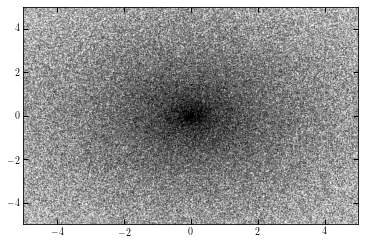

In [5]:
scatter(pos_tr[:,0], pos_tr[:,1], s=0.1, alpha=0.1, c='k')
xlim(-5, 5)
ylim(-5, 5)

In [6]:
r_s = 25.16
S, T = biff.compute_coeffs_discrete(np.ascontiguousarray(pos_tr.astype(double)), 
                                    np.ascontiguousarray(mass_tr.astype(double)), 10, 0, r_s )

In [7]:
def wc(file_name, S, T, r_s):
    S_flat = S.flatten()
    T_flat = T.flatten()


    f = open('./coefficients/ST_'+file_name, 'w')
    f.write('# Snlm, Tnlm \n')
    f.write('# r_s = {:.4f} \n'.format(r_s))

    for i in range(len(S_flat)):
        f.write("{:.7e} {:.7e} \n".format(S_flat[i], T_flat[i]))

    f.close()


In [52]:
wc('test.txt', S, T, r_s)

In [8]:
true_M = np.sum(mass_tr)

In [9]:
rho_bfe = biff.density(np.ascontiguousarray(pos_tr.astype(np.double)), S, T, 1, r_s)

In [74]:
r = (pos_tr[:,0]**2 + pos_tr[:,1]**2 + pos_tr[:,2]**2)**0.5
r_bins = np.linspace(0.01, 100, 20)
rho_bins = np.zeros(len(r_bins))
for i in range(len(rho_bins)-1):
    index_c = np.where((r<r_bins[i+1]) & (r>=r_bins[i]))[0]
    rho_bins[i] = np.mean(rho_bfe[index_c])
    dr = (r_bins[1]-r_bins[0])/2.


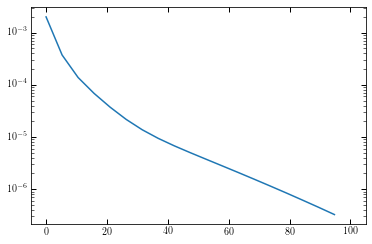

In [75]:
semilogy(r_bins, rho_bins)

In [27]:
y_bins = np.linspace(-200, 200, 10)
z_bins = np.linspace(-200, 200, 10)
y, z= meshgrid(y_bins, z_bins)

pos = np.array([np.ones(len(y.flatten())), y.flatten(), z.flatten()]).T

In [28]:
rho_bfe = biff.density(np.ascontiguousarray(pos.astype(np.double)), S, T, 1, r_s)

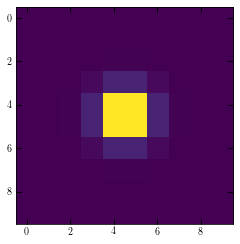

In [33]:
imshow(rho_bfe.reshape(10, 10))